In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.layers.core import Dense, Dropout, Activation
from keras import callbacks
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import math
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import warnings
import seaborn as sns
import sys
warnings.filterwarnings('ignore')

/Users/apple/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv('../../raw/LiChuan/TotalDataSet.csv')
submit = pd.read_csv('../../raw/CarsSaleForecast/yancheng_testA_20171225.csv')

In [3]:
data = data[data['year'] != 2012]

In [4]:
data_new=data[['sale_date', 'class_id', 'sale_quantity']]

In [5]:
data_new['num_time']=(data['year']-2012)*12+data['month']

In [6]:
data_new

,sale_date,class_id,sale_quantity,num_time
1680,2013-01,125403,238.0,13.0
1681,2013-01,136916,613.0,13.0
1682,2013-01,178529,1465.0,13.0
1683,2013-01,194450,106.0,13.0
1684,2013-01,198427,31.0,13.0
1685,2013-01,209945,283.0,13.0
1686,2013-01,248352,1428.0,13.0
1687,2013-01,281301,1555.0,13.0
1688,2013-01,290854,676.0,13.0
1689,2013-01,291086,1089.0,13.0


In [7]:
# class_id=data_new.class_id.unique()

# class_id

# s=dict(zip(class_id ,range(len(class_id ))))

# for i in s:
#     data_new.loc[data_new['class_id'] ==i,'class_id_reflect']=s[i]

In [8]:
class_id_dummies=pd.get_dummies(data_new['class_id'],prefix='class_id')
data_new=pd.concat([data_new,class_id_dummies],axis=1)


In [9]:
# data_new.drop('class_id_reflect',axis=1,inplace=True)

In [10]:
data_new

,sale_date,class_id,sale_quantity,num_time,class_id_103507,class_id_124140,class_id_125403,class_id_136916,class_id_169673,class_id_175962,...,class_id_923841,class_id_924154,class_id_948936,class_id_950264,class_id_953842,class_id_961362,class_id_961962,class_id_963845,class_id_973106,class_id_978089
1680,2013-01,125403,238.0,13.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,2013-01,136916,613.0,13.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,2013-01,178529,1465.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,2013-01,194450,106.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,2013-01,198427,31.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1685,2013-01,209945,283.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1686,2013-01,248352,1428.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,2013-01,281301,1555.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,2013-01,290854,676.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1689,2013-01,291086,1089.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data=data_new

In [12]:
data

,sale_date,class_id,sale_quantity,num_time,class_id_103507,class_id_124140,class_id_125403,class_id_136916,class_id_169673,class_id_175962,...,class_id_923841,class_id_924154,class_id_948936,class_id_950264,class_id_953842,class_id_961362,class_id_961962,class_id_963845,class_id_973106,class_id_978089
1680,2013-01,125403,238.0,13.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,2013-01,136916,613.0,13.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,2013-01,178529,1465.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,2013-01,194450,106.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,2013-01,198427,31.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1685,2013-01,209945,283.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1686,2013-01,248352,1428.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,2013-01,281301,1555.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,2013-01,290854,676.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1689,2013-01,291086,1089.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# 去掉 2012 年数据

labels = data['sale_quantity']
data = data.drop(['sale_date', 'class_id', 'sale_quantity'], axis=1)

In [18]:
# 训练集 2013-01 至 2017-07, 测试集 2017-08
train_1 = data[:-560]
test_1 = data[-560:-420]
labels_1 = labels[:-560]
test_labels_1 = labels[-560:-420]

# 训练集 2013-01 至 2017-08, 测试集 2017-09
train_2 = data[:-420]
test_2 = data[-420:-280]
labels_2 = labels[:-420]
test_labels_2 = labels[-420:-280]

# 训练集 2013-01 至 2017-09, 测试集 2017-10
train_3 = data[:-280]
test_3 = data[-280:-140]
labels_3 = labels[:-280]
test_labels_3 = labels[-280:-140]

In [19]:
# 训练集 2013-01 至 2017-07, 测试集 2017-08
train_1 = train_1.as_matrix()
test_1 = test_1.as_matrix()
labels_1 = labels_1.as_matrix()
test_labels_1 = test_labels_1.as_matrix()
# 训练集 2013-01 至 2017-08, 测试集 2017-09
train_2 = train_2.as_matrix()
test_2 = test_2.as_matrix()
labels_2 = labels_2.as_matrix()
test_labels_2 = test_labels_2.as_matrix()

# 训练集 2013-01 至 2017-09, 测试集 2017-10
train_3 = train_3.as_matrix()
test_3 = test_3.as_matrix()
labels_3 = labels_3.as_matrix()
test_labels_3 = test_labels_3.as_matrix()

In [43]:
train_1[:,-8].shape

(7700,)

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_1 = scaler.fit_transform(train_1)
test_1 = scaler.fit_transform(test_1)

train_2 = scaler.fit_transform(train_2)
test_2 = scaler.fit_transform(test_2)

train_3 = scaler.fit_transform(train_3)
test_3 = scaler.fit_transform(test_3)

In [47]:
# labels_1 = scaler.fit_transform(labels_1)
# test_labels_1 = scaler.fit_transform(test_labels_1)

# labels_2 = scaler.fit_transform(labels_2)
# test_labels_2 = scaler.fit_transform(test_labels_2)

# labels_3 = scaler.fit_transform(labels_3)
# test_labels_3 = scaler.fit_transform(test_labels_3)

In [48]:
train_1.shape

(7700, 141)

In [49]:

train_1 = train_1.reshape((train_1.shape[0], 1, train_1.shape[1]))
test_1 = test_1.reshape((test_1.shape[0], 1, test_1.shape[1]))
train_2 = train_2.reshape((train_2.shape[0], 1, train_2.shape[1]))
test_2 = test_2.reshape((test_2.shape[0], 1, test_2.shape[1]))
train_3 = train_3.reshape((train_3.shape[0], 1, train_3.shape[1]))
test_3 = test_3.reshape((test_3.shape[0], 1, test_3.shape[1]))

In [52]:
train_1.shape[2]

141

In [23]:
# BATCH_START = 0
# TIME_STEPS = 20 #取20步
# BATCH_SIZE = 50
# INPUT_SIZE = 1 #输入的值
# OUTPUT_SIZE = 1 #输出预测的值
# CELL_SIZE = 20
# LR = 0.006

In [53]:
def rmse_loss(ground_truth, pred):
    # return mean_squared_error(ground_truth, pred)
    return K.sqrt(K.mean(K.square(ground_truth-pred),axis=-1))

In [54]:
model = Sequential()
# model.add(LSTM(
#     batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
#     output_dim=CELL_SIZE,
#     return_sequences=True,      # True: output at all steps. False: output as last step.
#     stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
# ))
model.add(LSTM(64, input_shape=(train_1.shape[1],train_1.shape[2])))
model.add(Dropout(.1))
model.add(Dense(64))
model.add(Dropout(.2))
model.add(Dense(16))
model.add(Dropout(.2))
model.add(Dense(1))
model.compile(loss = rmse_loss, optimizer='adam', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                52736     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total para

Train on 7700 samples, validate on 140 samples
Epoch 1/30
 - 3s - loss: 248.3707 - mean_squared_error: 292892.2376 - val_loss: 245.9520 - val_mean_squared_error: 202153.3075
Epoch 2/30
 - 1s - loss: 180.8913 - mean_squared_error: 183233.3429 - val_loss: 246.8144 - val_mean_squared_error: 170485.6232
Epoch 3/30
 - 1s - loss: 154.8603 - mean_squared_error: 132119.7628 - val_loss: 247.1116 - val_mean_squared_error: 145264.6838
Epoch 4/30
 - 1s - loss: 142.9588 - mean_squared_error: 105131.9138 - val_loss: 244.8792 - val_mean_squared_error: 131223.9235
Epoch 5/30
 - 1s - loss: 137.0312 - mean_squared_error: 92996.8604 - val_loss: 244.1191 - val_mean_squared_error: 124813.4271
Epoch 6/30
 - 1s - loss: 134.4543 - mean_squared_error: 85611.6420 - val_loss: 240.4335 - val_mean_squared_error: 121125.2472
Epoch 7/30
 - 1s - loss: 133.7855 - mean_squared_error: 84678.8123 - val_loss: 243.4900 - val_mean_squared_error: 121693.4923
Epoch 8/30
 - 1s - loss: 133.1116 - mean_squared_error: 84117.3951 

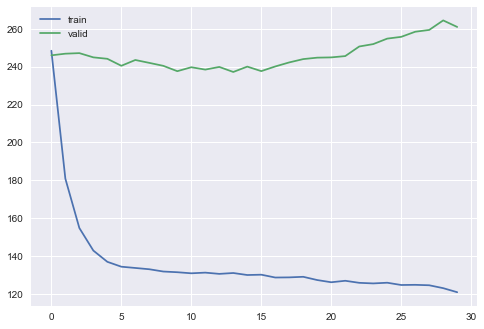

In [55]:
history = model.fit(train_1, labels_1, nb_epoch=30, batch_size=32,validation_data=(test_1, test_labels_1), verbose=2,shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

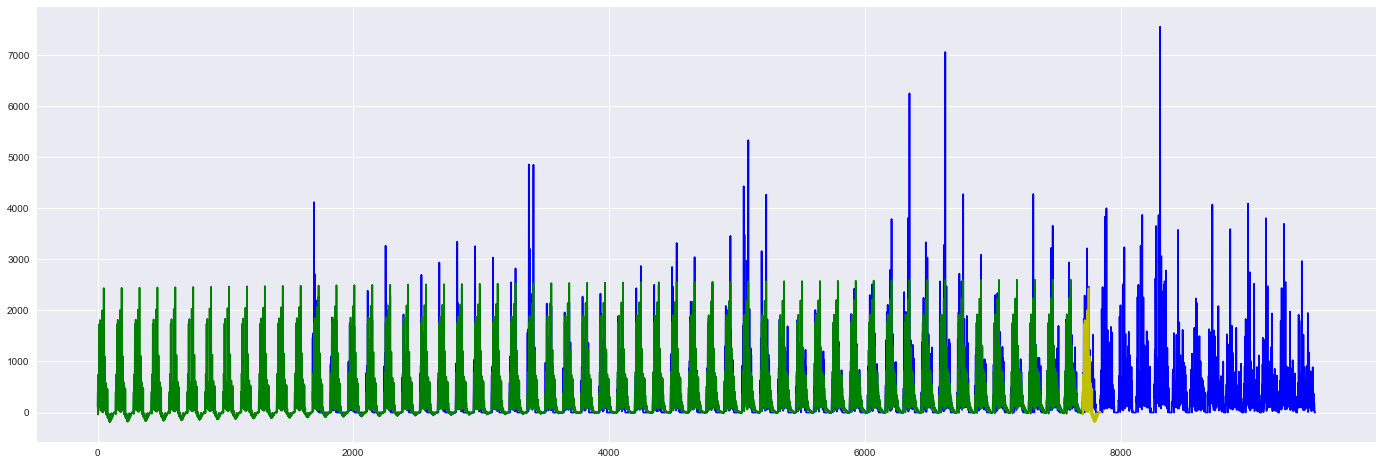

In [56]:
plt.figure(figsize=(24,8))
train_predict = model.predict(train_1)
valid_predict = model.predict(test_1)
#test_predict = model.predict(test_X)
plt.plot(labels[:-420], c='b')
plt.plot([x for x in train_predict], c='g')
plt.plot([None for _ in train_predict] + [x for x in valid_predict], c='y')
#plt.plot([None for _ in train_predict] + [None for _ in valid_predict] + [x for x in test_predict], c='r')
plt.show()

In [57]:
model.save('my_model.h5')   # HDF5 file, you have to pip3 install h5py if don't have it

In [58]:
pred_test_labels_1=model.predict(test_1)

In [59]:
math.sqrt(((pred_test_labels_1 - test_labels_1)**2).mean())

612.4969329063647

In [45]:
labels

1680     238.0
1681     613.0
1682    1465.0
1683     106.0
1684      31.0
1685     283.0
1686    1428.0
1687    1555.0
1688     676.0
1689    1089.0
1690     348.0
1691     792.0
1692    4123.0
1693    1167.0
1694     378.0
1695     789.0
1696     335.0
1697     180.0
1698    2712.0
1699      76.0
1700     627.0
1701     277.0
1702     245.0
1703     105.0
1704     303.0
1705    1020.0
1706     413.0
1707     487.0
1708     857.0
1709     810.0
         ...  
9910       0.0
9911       0.0
9912       0.0
9913       0.0
9914       0.0
9915       0.0
9916       0.0
9917       0.0
9918       0.0
9919       0.0
9920       0.0
9921       0.0
9922       0.0
9923       0.0
9924       0.0
9925       0.0
9926       0.0
9927       0.0
9928       0.0
9929       0.0
9930       0.0
9931       0.0
9932       0.0
9933       0.0
9934       0.0
9935       0.0
9936       0.0
9937       0.0
9938       0.0
9939       0.0
Name: sale_quantity, Length: 8260, dtype: float64